In [2]:
from qiskit import Aer, QuantumCircuit, transpile, assemble
from qiskit.visualization import plot_histogram

In [44]:
def oracle_gate(n, k):
    oracle_circuit = QuantumCircuit(n+1, name="Oracle")
    
    # Configurar el oráculo
    for qubit in range(n):
        if (k >> qubit) & 1:
            oracle_circuit.x(qubit)
    
    # Implementar el oráculo con compuertas CX (CNOT)
    oracle_circuit.cx(range(n), n)
    
    # Deshacer los cambios en la entrada
    for qubit in range(n):
        if (k >> qubit) & 1:
            oracle_circuit.x(qubit)
    
    return oracle_circuit.to_gate()

In [45]:
def grover_circuit(n, oracle_gate, iterations):
    grover_circuit = QuantumCircuit(n+1, n)
    
    # Inicializar los qubits en superposición
    grover_circuit.h(range(n+1))
    
    # Implementar Grover's algorithm
    for _ in range(iterations):
        grover_circuit.append(oracle_gate, range(n+1))
        grover_circuit.h(range(n+1))
        grover_circuit.x(range(n+1))
        grover_circuit.h(n)
        
        # Implementar el oráculo con compuertas CX (CNOT)
        grover_circuit.append(oracle_gate, range(n+1))
        
        grover_circuit.h(n)
        grover_circuit.x(range(n+1))
        grover_circuit.h(range(n+1))
    
    # Medir los qubits
    grover_circuit.measure(range(n), range(n))
    
    return (grover_circuit,grover_circuit.draw(output="mpl"))

In [79]:
# Lista de ejemplo

#Lista original
#lista = [25, 37, 47, 29, 8, 12, 44, 30, 24, 33, 15, 39, 46, 5, 22]

#Lista con el número en la primera posición
#lista = [8, 37, 47, 29, 25, 12, 44, 30, 24, 33, 15, 39, 46, 5, 22]

#Lista con el número en la última posición
lista = [25, 37, 47, 29, 22, 12, 44, 30, 24, 33, 15, 39, 46, 5, 8]
# Valor a buscar
k = 8

In [80]:
# Encontrar la posición de k en la lista
posicion = lista.index(k)

# Número de bits necesario para representar la lista
n = len(bin(max(lista))) - 2

In [81]:
# Crear el oráculo y el circuito de Grover
oracle = oracle_gate(n, posicion)
grover_circuito,draw = grover_circuit(n, oracle, iterations=10)

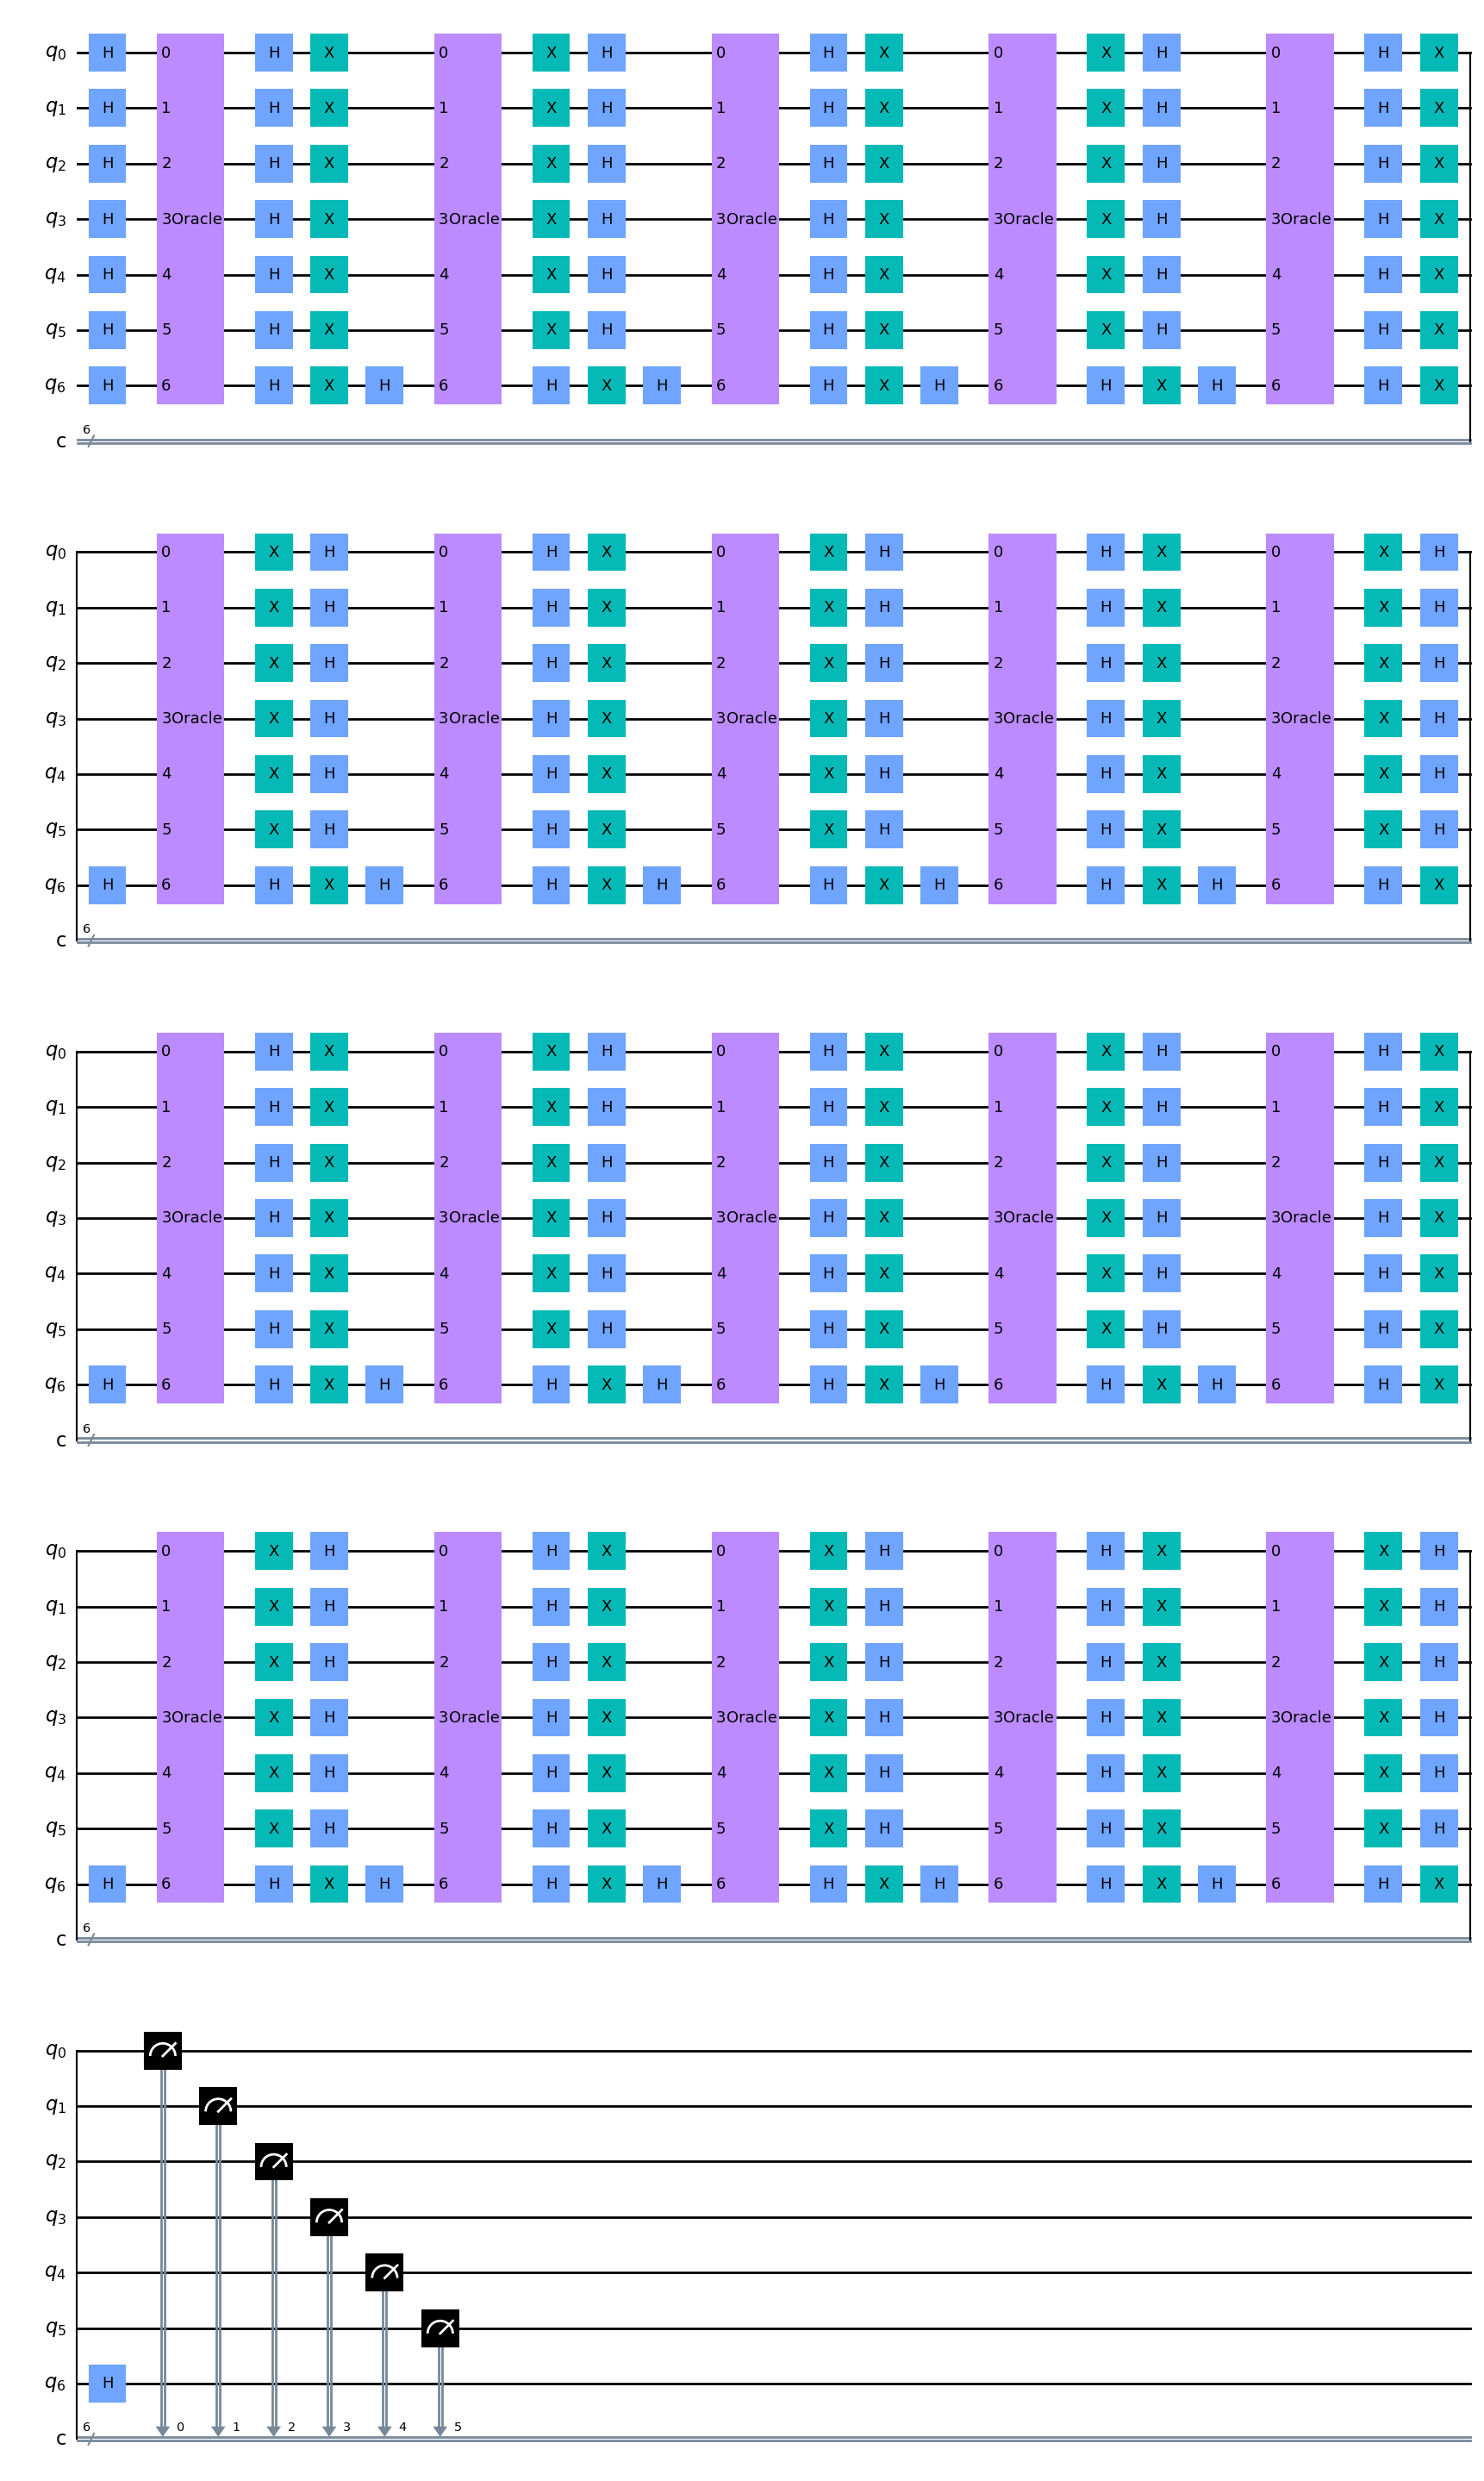

In [74]:
draw

In [82]:
# Simular el circuito
simulador = Aer.get_backend('qasm_simulator')
resultados = simulador.run(transpile(grover_circuito, simulador)).result()
conteos = resultados.get_counts()

{'000010': 11, '110101': 13, '101011': 14, '000101': 15, '110010': 19, '101110': 13, '011110': 19, '101001': 15, '010010': 14, '101100': 16, '000011': 15, '110100': 17, '111010': 15, '100110': 15, '001111': 22, '000001': 18, '110110': 23, '101010': 21, '111001': 15, '101111': 10, '000110': 19, '110001': 18, '100001': 13, '111111': 17, '001010': 16, '010000': 17, '101000': 19, '011011': 13, '001000': 16, '110111': 14, '000000': 16, '010100': 25, '010110': 14, '000111': 25, '110000': 18, '010011': 13, '011101': 11, '001001': 9, '100100': 13, '001101': 15, '111100': 18, '111011': 16, '100101': 13, '001110': 14, '100111': 16, '101101': 21, '000100': 16, '110011': 23, '100010': 13, '111110': 15, '001011': 12, '100011': 19, '001100': 13, '111101': 23, '011001': 19, '010111': 18, '010001': 23, '011010': 12, '011100': 17, '010101': 14, '100000': 11, '111000': 11, '011111': 14, '011000': 12}


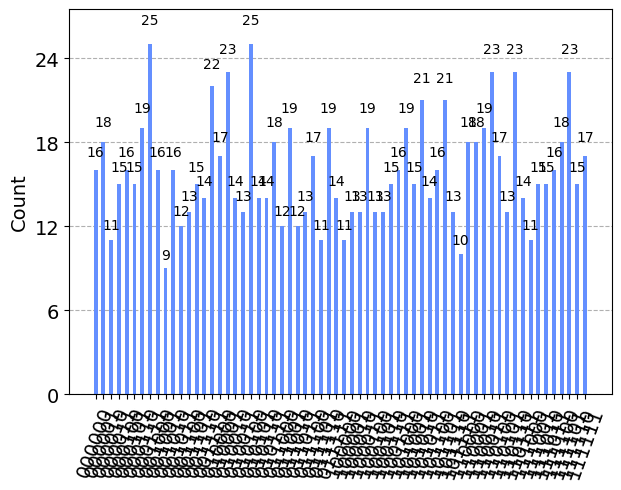

In [83]:
# Mostrar los resultados
print(conteos)
plot_histogram(conteos)

In [84]:
# Encontrar la posición más probable
posicion_mas_probable = int(max(conteos, key=conteos.get), 2)

# Imprimir resultados
print("Posición de {} en la lista:".format(k), posicion_mas_probable)

Posición de 8 en la lista: 20


In [85]:
# Mostrar bits correspondientes a cada elemento en la lista
for estado, frecuencia in conteos.items():
    decimal = int(estado, 2)
    print(f"Bits para {decimal}: {estado}")

Bits para 2: 000010
Bits para 53: 110101
Bits para 43: 101011
Bits para 5: 000101
Bits para 50: 110010
Bits para 46: 101110
Bits para 30: 011110
Bits para 41: 101001
Bits para 18: 010010
Bits para 44: 101100
Bits para 3: 000011
Bits para 52: 110100
Bits para 58: 111010
Bits para 38: 100110
Bits para 15: 001111
Bits para 1: 000001
Bits para 54: 110110
Bits para 42: 101010
Bits para 57: 111001
Bits para 47: 101111
Bits para 6: 000110
Bits para 49: 110001
Bits para 33: 100001
Bits para 63: 111111
Bits para 10: 001010
Bits para 16: 010000
Bits para 40: 101000
Bits para 27: 011011
Bits para 8: 001000
Bits para 55: 110111
Bits para 0: 000000
Bits para 20: 010100
Bits para 22: 010110
Bits para 7: 000111
Bits para 48: 110000
Bits para 19: 010011
Bits para 29: 011101
Bits para 9: 001001
Bits para 36: 100100
Bits para 13: 001101
Bits para 60: 111100
Bits para 59: 111011
Bits para 37: 100101
Bits para 14: 001110
Bits para 39: 100111
Bits para 45: 101101
Bits para 4: 000100
Bits para 51: 110011
Bi